In [2]:
import pandas as pd
import pandas as pd

In [3]:
train_data = pd.read_csv('../GAN/dataset/dataset1/train_xy.csv')
test_data = pd.read_csv('../GAN/dataset/dataset1/test_xy.csv')


['ct_state_ttl', 'sttl', 'dttl', 'swin', 'dwin', 'ackdat', 'stcpb', 'dtcpb']
['ct_state_ttl', 'sttl', 'dttl', 'swin', 'dwin', 'ackdat', 'stcpb']
['ct_state_ttl', 'sttl', 'dttl', 'swin', 'dwin', 'ackdat']
['ct_state_ttl', 'sttl', 'dttl', 'swin', 'dwin']
['ct_state_ttl', 'sttl', 'dttl', 'swin']
特徵數量: 8
訓練時間: 0.08351612091064453 秒
AUC: 0.9966054227589609
最佳閥值: 0.4411828867760499
混淆矩陣:
[[174939   2421]
 [  1618  24226]]
準確率 (Accuracy): 0.9801234227672684
精確率 (Precision): 0.9091454948024168
召回率 (Recall): 0.9373935923231698
F1分數 (F1 Score): 0.9230534758339525


特徵數量: 7
訓練時間: 0.08068013191223145 秒
AUC: 0.996604893709434
最佳閥值: 0.44159546636487534
混淆矩陣:
[[174940   2420]
 [  1625  24219]]
準確率 (Accuracy): 0.9800938957894529
精確率 (Precision): 0.9091557490896806
召回率 (Recall): 0.9371227364185111
F1分數 (F1 Score): 0.9229274241182859


特徵數量: 6
訓練時間: 0.05852079391479492 秒
AUC: 0.9966049444327391
最佳閥值: 0.4418460620939504
混淆矩陣:
[[174942   2418]
 [  1624  24220]]
準確率 (Accuracy): 0.9801086592783607
精確率 (Prec

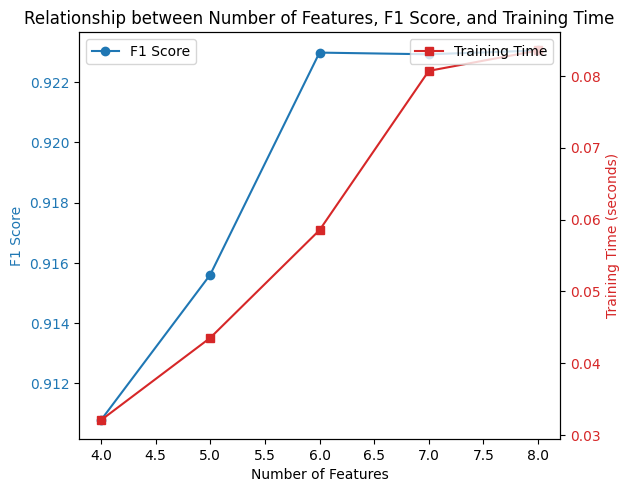

In [4]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# 假設 train_data 和 test_data 是已經存在的資料集
# 複製資料
df_train = train_data.copy()
df_test = test_data.copy()

# 初始特徵列表
initial_features = [
    'ct_state_ttl', 'sttl','dttl','swin','dwin','ackdat','stcpb','dtcpb'
]

# 假設 'attack' 是你的目標欄位
y_train = df_train['attack_cat'].apply(lambda x: 1 if x > 0 else 0)
y_test = df_test['attack_cat'].apply(lambda x: 1 if x > 0 else 0)

results = []

# 迴圈減少特徵數量直到剩下4個特徵
for num_features in range(len(initial_features), 3, -1):
    features = initial_features[:num_features]
    X_train = df_train[features]
    X_test = df_test[features]
    
    # 創建和訓練線性回歸模型
    model = LinearRegression()
    
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # 獲取模型的係數和截距
    coefficients = model.coef_
    intercept = model.intercept_
    
    # 預測值
    predictions = model.predict(X_test)
    
    # 計算ROC曲線
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    
    # 計算AUC
    auc_score = roc_auc_score(y_test, predictions)
    
    # 計算最佳閥值
    optimal_threshold = threshold_otsu(predictions)
    
    # 使用最佳閥值進行分類
    y_pred = [1 if pred > optimal_threshold else 0 for pred in predictions]
    
    # 計算混淆矩陣
    cm = confusion_matrix(y_test, y_pred)
    
    # 計算各種評估指標
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # 記錄結果
    results.append({
        "特徵數量": num_features,
        "訓練時間": training_time,
        "AUC": auc_score,
        "最佳閥值": optimal_threshold,
        "混淆矩陣": cm,
        "準確率": accuracy,
        "精確率": precision,
        "召回率": recall,
        "F1分數": f1
    })

# 輸出所有結果
for result in results:
    print(f"特徵數量: {result['特徵數量']}")
    print(f"訓練時間: {result['訓練時間']} 秒")
    print(f"AUC: {result['AUC']}")
    print(f"最佳閥值: {result['最佳閥值']}")
    print(f"混淆矩陣:\n{result['混淆矩陣']}")
    print(f"準確率 (Accuracy): {result['準確率']}")
    print(f"精確率 (Precision): {result['精確率']}")
    print(f"召回率 (Recall): {result['召回率']}")
    print(f"F1分數 (F1 Score): {result['F1分數']}")
    print("\n")

# 提取數據
features = [result['特徵數量'] for result in results]
training_times = [result['訓練時間'] for result in results]
f1_scores = [result['F1分數'] for result in results]

# 繪製 F1 分數 和 訓練時間 圖
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('F1 Score', color=color)
ax1.plot(features, f1_scores, color=color, marker='o', label='F1 Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Training Time (seconds)', color=color)  
ax2.plot(features, training_times, color=color, marker='s', label='Training Time')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  
plt.title('Relationship between Number of Features, F1 Score, and Training Time')
plt.show()


In [14]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from skimage.filters import threshold_otsu

# 假設 train_data 和 test_data 是已經存在的資料集
# 複製資料
df_train = train_data.copy()
df_test = test_data.copy()

# 特徵選擇
features = [
    'ct_state_ttl', 
    'sttl',
    'dttl'
    'swin',
    'dwin',
    'ackdat'
    'stcpb'
    'dtcpb'
]
X_train = df_train[features]
X_test = df_test[features]

# 假設 'attack' 是你的目標欄位
y_train = df_train['attack_cat'].apply(lambda x: 1 if x > 0 else 0)
y_test = df_test['attack_cat'].apply(lambda x: 1 if x > 0 else 0)

# 創建和訓練線性回歸模型
model = LinearRegression()

start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# 獲取模型的係數和截距
coefficients = model.coef_
intercept = model.intercept_

# 輸出結果
print("係數 (β):", coefficients)
print("截距 (β0):", intercept)

# 預測值
predictions = model.predict(X_test)

# 計算ROC曲線
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# 計算AUC
auc_score = roc_auc_score(y_test, predictions)
print("AUC:", auc_score)

# 計算最佳閥值
optimal_threshold = threshold_otsu(predictions)
print("最佳閥值:", optimal_threshold)

# 使用最佳閥值進行分類
y_pred = [1 if pred > optimal_threshold else 0 for pred in predictions]

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 輸出混淆矩陣
print("混淆矩陣:")
print(cm)

# 計算各種評估指標
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 輸出評估指標
print("準確率 (Accuracy):", accuracy)
print("精確率 (Precision):", precision)
print("召回率 (Recall):", recall)
print("F1分數 (F1 Score):", f1)

# 輸出訓練時間
print("訓練時間 (Training Time):", training_time, "秒")


係數 (β): [ 0.16757255  0.1512383  -0.79687963  0.79648227  0.01919706]
截距 (β0): 0.1263481332593107
AUC: 0.9962980699636214
最佳閥值: 0.4471231865456218
混淆矩陣:
[[174744   2616]
 [  1814  24030]]
準確率 (Accuracy): 0.9781992480462983
精確率 (Precision): 0.9018239135329881
召回率 (Recall): 0.9298096269927256
F1分數 (F1 Score): 0.9156029719946657
訓練時間 (Training Time): 0.04288339614868164 秒
新的檔案已保存為 filtered_predictions.csv
LABEL 為 1 的數量: 1814
LABEL 為 0 的數量: 177360


係數 (β): [ 0.16757255  0.1512383  -0.79687963  0.79648227  0.01919706]
截距 (β0): 0.1263481332593107
[ 0.92927729 -0.00126313 -0.00126313 ... -0.00126313  0.79556008
 -0.00126313]
AUC: 0.9962980699636214


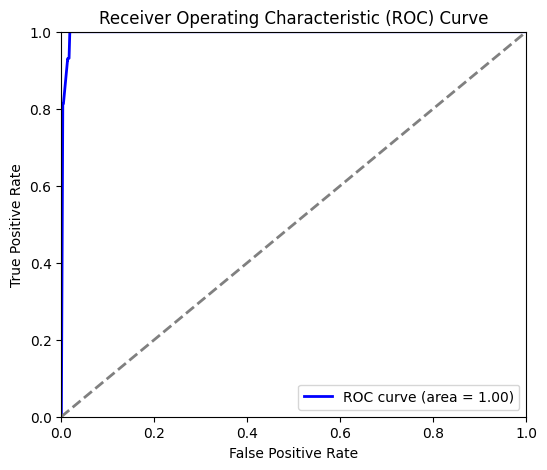

最佳閥值: 0.40633006176650727
混淆矩陣:
[[174393   2967]
 [  1780  24064]]
準確率 (Accuracy): 0.9766392393850515
精確率 (Precision): 0.8902371351411342
召回率 (Recall): 0.9311252128153537
F1 分數 (F1 Score): 0.9102222222222223


In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 假設train_data和test_data已經定義
df_train = train_data.copy()
df_test = test_data.copy()

# 特徵選擇
features = [
    'ct_state_ttl', 'sttl',  'swin','dwin','dttl'
]
X_train = df_train[features]
X_test = df_test[features]

# 假設 'attack' 是你的目標欄位
y_train = df_train['attack_cat'].apply(lambda x: 1 if x > 0 else 0)
y_test = df_test['attack_cat'].apply(lambda x: 1 if x > 0 else 0)

# 創建和訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 獲取模型的係數和截距
coefficients = model.coef_
intercept = model.intercept_

# 輸出結果
print("係數 (β):", coefficients)
print("截距 (β0):", intercept)

# 預測值
predictions = model.predict(X_test)
print(predictions)

# 計算ROC曲線
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# 計算AUC
auc_score = roc_auc_score(y_test, predictions)
print("AUC:", auc_score)

# 繪製ROC曲線
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 找到最佳閥值
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("最佳閥值:", optimal_threshold)

# 判斷是否為攻擊並統計各種情形
y_pred = [1 if pred > optimal_threshold else 0 for pred in predictions]

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 輸出混淆矩陣
print("混淆矩陣:")
print(cm)

# 提取統計結果
true_positive = cm[1, 1]
false_positive = cm[0, 1]
true_negative = cm[0, 0]
false_negative = cm[1, 0]

# 計算四大指標
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 輸出四大指標
print("準確率 (Accuracy):", accuracy)
print("精確率 (Precision):", precision)
print("召回率 (Recall):", recall)
print("F1 分數 (F1 Score):", f1)


In [7]:
from skimage.filters import threshold_otsu

print(predictions)
optimal_threshold = threshold_otsu(predictions)
print(optimal_threshold)

data_ostu = pd.DataFrame({'predictions': predictions, 'attack': y_test})
print(data_ostu)

[ 0.92927729 -0.00126313 -0.00126313 ... -0.00126313  0.79556008
 -0.00126313]
0.4471231865456218
        predictions  attack
0          0.929277       1
1         -0.001263       0
2         -0.001263       0
3          0.000370       0
4          0.000370       0
...             ...     ...
203199    -0.001263       0
203200     0.000370       0
203201    -0.001263       0
203202     0.795560       0
203203    -0.001263       0

[203204 rows x 2 columns]


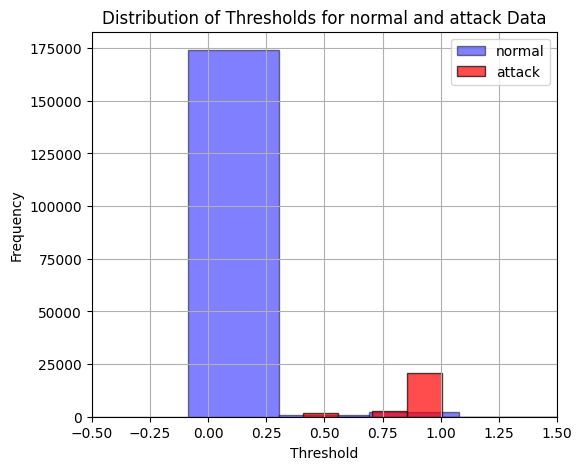

In [8]:
# 將 predictions 分成兩部分
red_threshold = data_ostu[data_ostu['attack'] == 0]['predictions']
blue_threshold = data_ostu[data_ostu['attack'] > 0]['predictions']

# 繪製直方圖
plt.figure(figsize=(6, 5))
plt.hist(red_threshold, bins=10, color='blue', edgecolor='black', alpha=0.5, label='normal')
plt.hist(blue_threshold, bins=10, color='red', edgecolor='black', alpha=0.7, label='attack')

# 添加標題和標籤
plt.title('Distribution of Thresholds for normal and attack Data')
plt.xlabel('Threshold')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# 調整 x 軸範圍
plt.xlim(-0.5, 1.5)

# 顯示圖表
plt.show()
